In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Exception ignored in: <function _xla_gc_callback at 0x7e9e47e46290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
# due to more images processing of all images is very hard so we use generators as ram kam pd jata h
# keras use generators it divide the data in batches
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data/train',
    labels= 'inferred',
    label_mode = 'int',   #no to images cows 0 and buffalo 1
    batch_size = 32,
    image_size = (256,256)    #image 256*256 m resize ho jayegoi
)

validation_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data/test',
    labels= 'inferred',
    label_mode = 'int',   #no to images cows 0 and buffalo 1
    batch_size = 32,
    image_size = (256,256)    #image 256*256 m resize ho jayegoi
)

Found 797 files belonging to 2 classes.
Found 581 files belonging to 2 classes.


In [ ]:
#these files are stored in numpy array format store hua h isme har value 0 to 255 h

#normalise
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#the above process is done because we want on value betweeen 0 and 1



In [ ]:
#creating cnn model and passing the data
# 3 convocation layer
# 1 layer 32 filters 2 layer 64 filter and 3 layer 128 filter

model =  Sequential()

model.add(Conv2D(32,kernel_size= (3,3),padding ='valid',activation='relu',input_shape = (256,256,3)) )
# model.add(BatchNormalization())
#after convocation layer there will be the pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size= (3,3),padding ='valid',activation='relu'))
# model.add(BatchNormalization())
#after convocation layer there will be the pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size= (3,3),padding ='valid',activation='relu'))
# model.add(BatchNormalization())
#after convocation layer there will be the pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# model  = Sequential()
# model.add(Dense(128,input_dim = 2,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)))
# model.add(Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
#compiling model

model.compile(optimizer ='adam',loss='binary_crossentropy',metrics =['accuracy'])



In [ ]:
#running the model
history = model.fit(train_ds,epochs=10,validation_data= validation_ds)

Epoch 1/10
25/25 [==============================] - 171s 5s/step - loss: 0.6854 - accuracy: 0.7051 - val_loss: 0.3020 - val_accuracy: 0.8864
Epoch 2/10
25/25 [==============================] - 60s 2s/step - loss: 0.2629 - accuracy: 0.8984 - val_loss: 0.1416 - val_accuracy: 0.9518
Epoch 3/10
25/25 [==============================] - 57s 2s/step - loss: 0.1781 - accuracy: 0.9448 - val_loss: 0.0972 - val_accuracy: 0.9690
Epoch 4/10
25/25 [==============================] - 59s 2s/step - loss: 0.1286 - accuracy: 0.9573 - val_loss: 0.1359 - val_accuracy: 0.9587
Epoch 5/10
25/25 [==============================] - 59s 2s/step - loss: 0.1669 - accuracy: 0.9410 - val_loss: 0.0714 - val_accuracy: 0.9759
Epoch 6/10
25/25 [==============================] - 57s 2s/step - loss: 0.0659 - accuracy: 0.9787 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 7/10
25/25 [==============================] - 49s 2s/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0176 - val_accuracy: 0.9966
Epoch 8/10
25/25 [=

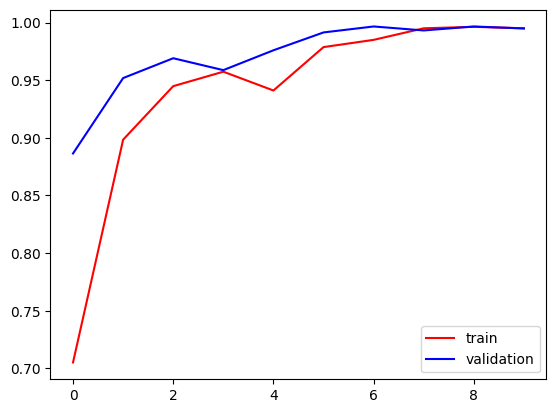

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label ='validation')
plt.legend()
plt.show()

In [ ]:
#clearly we can see the gap between train and validation
#now plotting the validation loss and train loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label ='validation')
plt.legend()
plt.show()



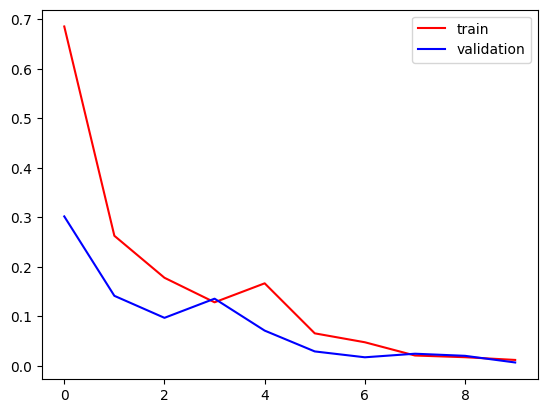

In [ ]:
#after using the batchnormalization and dropout

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label ='validation')
plt.legend()
plt.show()


In [ ]:
import cv2


In [ ]:
test_img = cv2.imread('/content/cow.jpg')


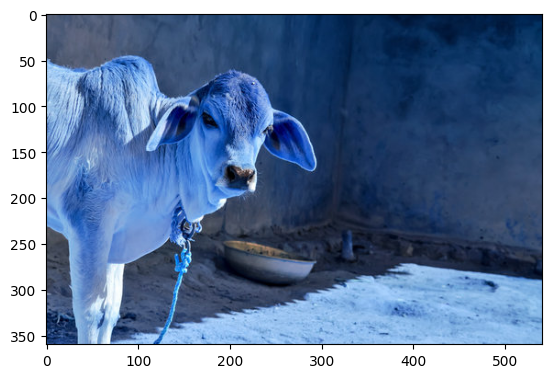

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(360, 541, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3)) #we have tell we are having only one image in this btch


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)